In [30]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [ ]:

for i in range(32, 50):
    dqns.append(train_dqn(true_env, 1e6, f"1M-{i}"))

In [21]:
dqns_every = []
for i in range(50):
    dqns_every.append(train_dqn(true_env, 5000, f"5000-{i}"))

In [31]:
dqns = [Training.load(f"json/dqn/DQN-1M-{i}_object.pkl") for i in range(32)]

/Users/luisastue/miniconda3/lib/python3.10/site-packages/stable_baselines3/common/base_class.py:772: UserWarning: You are probably loading a DQN model saved with SB3 < 2.4.0, we truncated the optimizer state so you can save the model again to avoid issues in the future (see https://github.com/DLR-RM/stable-baselines3/pull/1963 for more info). Original error: loaded state dict contains a parameter group that doesn't match the size of optimizer's group 
Note: the model should still work fine, this only a warning.
  warnings.warn(


In [4]:
len(dqns)

30

In [22]:
rewards = [[np.sum(episode.rewards) for episode in dqn.episodes] for dqn in dqns]

In [23]:
# Transpose the rewards to group values at the same index across all dqns
min_length = min(len(r) for r in rewards)  # Find the longest sequence
mean_rewards = []
std_rewards = []

for i in range(min_length):
    # Collect all rewards at index i, ignoring missing values
    values_at_i = [r[i] for r in rewards]
    mean_rewards.append(float(np.mean(values_at_i)))
    std_rewards.append(float(np.std(values_at_i)))
    

print(mean_rewards)
print(std_rewards)


[-0.5600000023841858, -0.6399999856948853, -0.6800000071525574, -0.699999988079071, -0.7599999904632568, -0.6600000262260437, -0.7400000095367432, -0.7599999904632568, -0.6200000047683716, -0.6800000071525574, -0.5400000214576721, -0.7599999904632568, -0.6800000071525574, -0.6399999856948853, -0.6399999856948853, -0.5799999833106995, -0.5799999833106995, -0.7599999904632568, -0.5199999809265137, -0.6600000262260437, -0.7400000095367432, -0.6399999856948853, -0.6399999856948853, -0.699999988079071, -0.699999988079071, -0.6800000071525574, -0.800000011920929, -0.7400000095367432, -0.7200000286102295, -0.7200000286102295, -0.6800000071525574, -0.6399999856948853, -0.8199999928474426, -0.6600000262260437, -0.6800000071525574, -0.6600000262260437, -0.699999988079071, -0.8199999928474426, -0.6800000071525574, -0.6600000262260437, -0.6000000238418579, -0.6200000047683716, -0.7200000286102295, -0.6200000047683716, -0.7400000095367432, -0.6000000238418579, -0.7400000095367432, -0.72000002861022

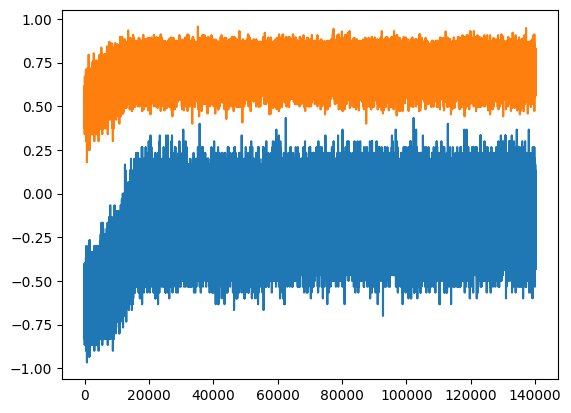

In [8]:
plt.plot(mean_rewards)
plt.plot(std_rewards)

In [24]:
import json

directory = "json/dqn/"
os.makedirs(directory, exist_ok=True)
object_path = os.path.join(
    directory, "DQN-mean-rewards-35000.json"
)

with open(object_path, 'w') as file:
    description = str(f"Mean rewards for DQN over 50 runs with {str(len(mean_rewards))} episode interactions")
    json_file = {
        "name": "DQN",
        "info": {"description": description},
        "mean_rewards": mean_rewards,
        "std_rewards": std_rewards,
    }
    json.dump(json_file, file)



In [25]:
rewards_every = [[np.sum(episode.rewards) for episode in dqn.episodes] for dqn in dqns_every]
# Transpose the rewards to group values at the same index across all dqns
min_length = min(len(r) for r in rewards_every)  # Find the longest sequence
mean_rewards_every = []
std_rewards_every = []

for i in range(min_length):
    # Collect all rewards at index i, ignoring missing values
    values_at_i = [r[i] for r in rewards_every]
    mean_rewards_every.append(float(np.mean(values_at_i)))
    std_rewards_every.append(float(np.std(values_at_i)))
    

print(mean_rewards_every)
print(std_rewards_every)


[-0.6800000071525574, -0.6200000047683716, -0.5400000214576721, -0.6399999856948853, -0.6399999856948853, -0.5799999833106995, -0.6600000262260437, -0.7400000095367432, -0.6200000047683716, -0.5799999833106995, -0.6399999856948853, -0.7400000095367432, -0.7200000286102295, -0.7599999904632568, -0.7200000286102295, -0.7799999713897705, -0.6200000047683716, -0.5400000214576721, -0.6200000047683716, -0.7200000286102295, -0.699999988079071, -0.6600000262260437, -0.7799999713897705, -0.6600000262260437, -0.6000000238418579, -0.6800000071525574, -0.7799999713897705, -0.6600000262260437, -0.6200000047683716, -0.5600000023841858, -0.699999988079071, -0.6200000047683716, -0.5400000214576721, -0.699999988079071, -0.6800000071525574, -0.7400000095367432, -0.7799999713897705, -0.7200000286102295, -0.6800000071525574, -0.5799999833106995, -0.5600000023841858, -0.6600000262260437, -0.7799999713897705, -0.7400000095367432, -0.5, -0.7200000286102295, -0.7799999713897705, -0.6399999856948853, -0.639999

In [26]:
import json

directory = "json/dqn/"
os.makedirs(directory, exist_ok=True)
object_path = os.path.join(
    directory, "DQN-mean-rewards-5000.json"
)

with open(object_path, 'w') as file:
    description = str(f"Mean rewards for DQN over 50 runs with {str(len(mean_rewards))} episode interactions")
    json_file = {
        "name": "DQN",
        "info": {"description": description},
        "mean_rewards": mean_rewards_every,
        "std_rewards": std_rewards_every,
    }
    json.dump(json_file, file)



In [18]:
max(policies_learned)

-0.07915